In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv


In [109]:
#importing Libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dropout,Flatten,Conv2D,Dense,MaxPooling2D,Conv1D,Dropout

In [106]:
#Setting display of columns and rows to maximum
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [3]:
#importing Datasets
train_df=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
test_df=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

In [4]:
#defining image rows and cols
image_rows,image_cols=28,28
input_shape=(image_rows,image_cols,1)

In [107]:
#converting the dataframe to array and defining the independent variables and one hot encoded to the dependent variables
x=np.array(train_df.iloc[:,1:])
y=keras.utils.to_categorical(np.array(train_df.iloc[:,0]))

In [108]:
#spliting the train dataset to train and validate with the ratio of 75/25
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.25,random_state=1)

In [10]:
#for test data, convert the dataframe to array and converting dependent variables to one hot encoded vector
x_test=np.array(test_df.iloc[:,1:])
y_test=keras.utils.to_categorical(test_df.iloc[:,0])

In [13]:
#Standardizing the x_train,x_val,x_test... reshaping to (45000,28,28,1) 1 coz its a rgb image.
#dividig it with 255 coz the range varies from 0 to 255 where 0 is black and 255 is white and in between is grayish


x_train=x_train.reshape(x_train.shape[0],image_rows,image_cols,1)
x_test=x_test.reshape(x_test.shape[0],image_rows,image_cols,1)
x_val=x_val.reshape(x_val.shape[0],image_rows,image_cols,1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_val=x_val.astype('float32')

x_train/=255
x_test/=255
x_val/=255

In [18]:
# CNN Model Building
model=Sequential()
model.add(Conv2D(64,input_shape=(28,28,1),kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=1))
model.add(Dropout(0.25))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [110]:
#compile the model with the optimizer,loss and the respective metrics
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#Check the model summary which will tell the no of Convolutional Layers and the no of filter and kernel
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 23, 23, 32)        18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [21]:
#fit the model with training Dataset
model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=3)

Train on 45000 samples, validate on 15000 samples
Epoch 1/3
45000/45000 [==============================] - 97s 2ms/step - loss: 0.4360 - accuracy: 0.8427 - val_loss: 0.3461 - val_accuracy: 0.8769
Epoch 2/3
45000/45000 [==============================] - 97s 2ms/step - loss: 0.3016 - accuracy: 0.8903 - val_loss: 0.2799 - val_accuracy: 0.9036
Epoch 3/3
45000/45000 [==============================] - 95s 2ms/step - loss: 0.2563 - accuracy: 0.9063 - val_loss: 0.2831 - val_accuracy: 0.9016


In [23]:
#evaluate the model with the test data and check the acccuracy
score=model.evaluate(x_test,y_test,verbose=1)
score

10000/10000 [==============================] - 3s 336us/step


[0.26550581535100937, 0.9056000113487244]

In [27]:
#print the test loss and accuracy
print('test_loss : {}'.format(score[0]))
print('test_accuracy : {}'.format(score[1]))

test_loss : 0.26550581535100937
test_accuracy : 0.9056000113487244


In [45]:
#predict with test_dataset
predicted_classes=model.predict_classes(x_test)
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [69]:
#get the indices to be plotted
y_original = np.array(test_df.iloc[:, 0])
y_original

array([0, 1, 2, ..., 8, 8, 1])

In [103]:
#compare the predicted values with dependent variable orginal
correct = np.nonzero(predicted_classes==y_original)[0]
incorrect = np.nonzero(predicted_classes!=y_original)[0]

In [85]:
#Percentage of coreect values and incorrect values
print('correct values : {}'.format((len(correct)/(len(incorrect)+len(correct))*100)))
print('incorrect values : {}'.format((len(incorrect)/(len(incorrect)+len(correct))*100)))

correct values : 90.56
incorrect values : 9.44


In [40]:
num_classes=10

In [73]:
#classification report trying to check which class has the least precison and recall
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_original, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.81      0.89      0.85      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.88      0.81      0.84      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.78      0.93      0.85      1000
     Class 5       0.99      0.96      0.98      1000
     Class 6       0.81      0.63      0.71      1000
     Class 7       0.93      0.98      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



Class 6 is getting lacked in both precison and recall

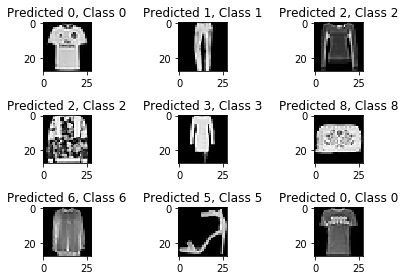

In [105]:
#for correctly predicted
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28),cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

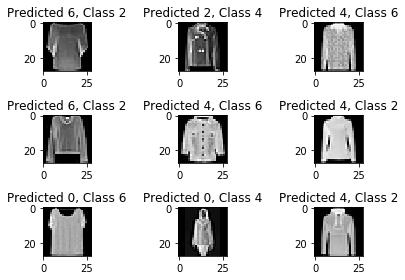

In [104]:
#for incorrectly Predicted
for i,incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28),cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_original[incorrect]))
    plt.tight_layout()